In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'consumerbehaviour.csv'  # Replace with the actual path
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Data Overview:")
print(df.info())  # Shows column names, data types, and non-null counts
print("\nFirst few rows:")
print(df.head())  # Display the first few rows of the dataset


Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object

In [ ]:
# Checking for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())



Missing Values per Column:
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


In [1]:

df.drop_duplicates(inplace=True)


NameError: name 'df' is not defined

In [ ]:

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [ ]:

print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
       customer_id          age  purchase_amount_(usd)  review_rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       previous_purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  


In [ ]:

for column in df.select_dtypes(include='object').columns:
    print(f"\nUnique values in {column}:")
    print(df[column].value_counts())



Unique values in gender:
gender
Male      2652
Female    1248
Name: count, dtype: int64

Unique values in item_purchased:
item_purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

Unique values in category:
category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

Unique values in location:
location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland         

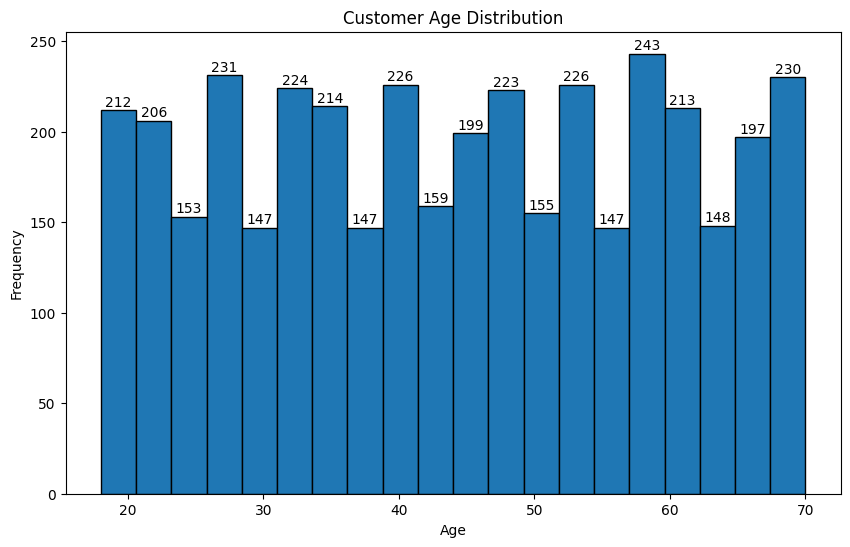

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

age_counts, bins, patches = plt.hist(df['age'], bins=20, edgecolor='black')
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")


for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2,
             age_counts[i] + 0.5,
             int(age_counts[i]),
             ha='center', va='bottom')
plt.show()

<ipython-input-8-740b95dfa59b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_items.index, x=top_items.values, palette="viridis")


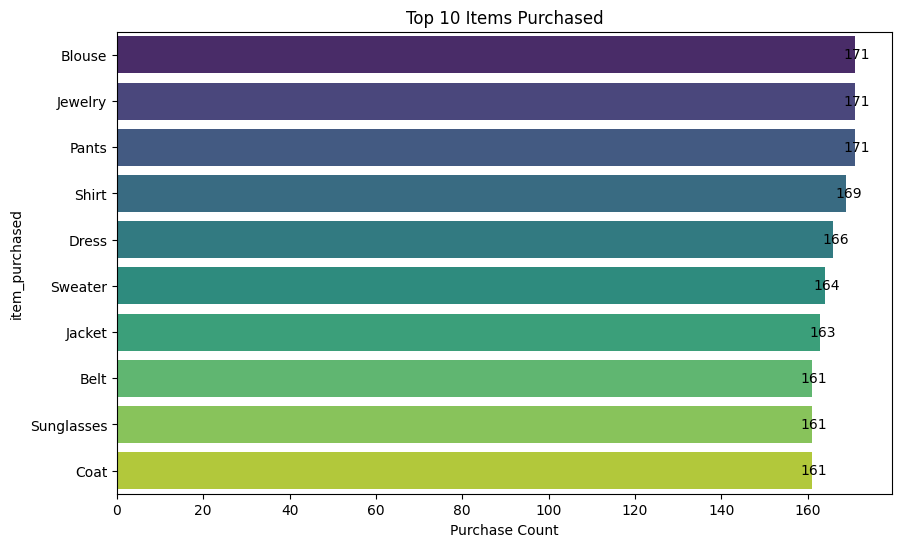

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
top_items = df['item_purchased'].value_counts().head(10)
sns.barplot(y=top_items.index, x=top_items.values, palette="viridis")
plt.title("Top 10 Items Purchased")
plt.xlabel("Purchase Count")


for index, value in enumerate(top_items.values):
    plt.text(value + 0.5, index, str(value), ha='center', va='center')

plt.show()


<ipython-input-9-b829e98c8d3e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_purchase_by_category.index, y=avg_purchase_by_category.values, palette="viridis")


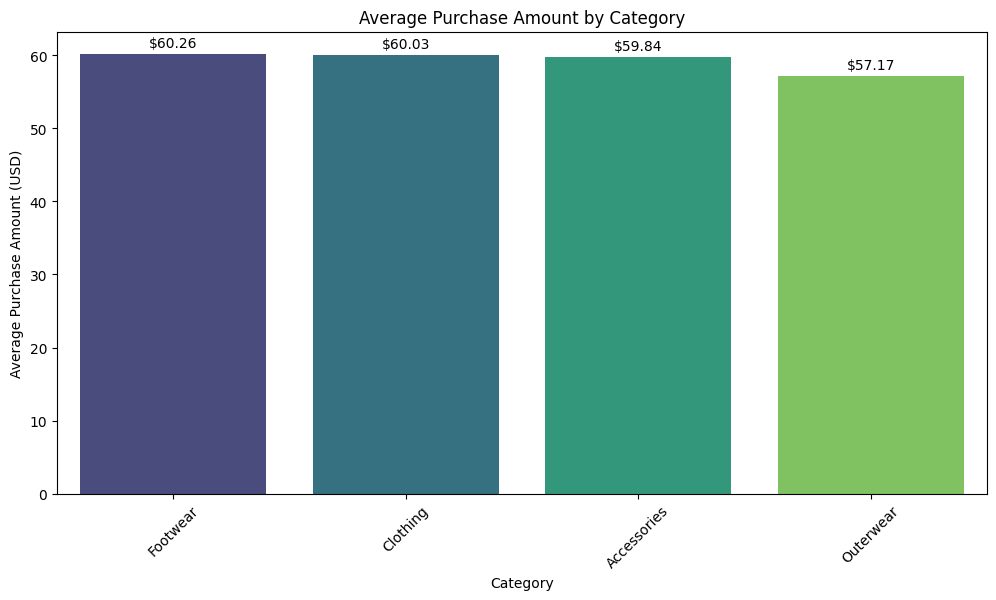

In [ ]:

plt.figure(figsize=(12, 6))
avg_purchase_by_category = df.groupby('category')['purchase_amount_(usd)'].mean().sort_values(ascending=False)
sns.barplot(x=avg_purchase_by_category.index, y=avg_purchase_by_category.values, palette="viridis")
plt.title("Average Purchase Amount by Category")
plt.xlabel("Category")
plt.ylabel("Average Purchase Amount (USD)")
plt.xticks(rotation=45)


for index, value in enumerate(avg_purchase_by_category.values):
    plt.text(index, value + 0.5, f"${value:.2f}", ha='center', va='bottom')

plt.show()

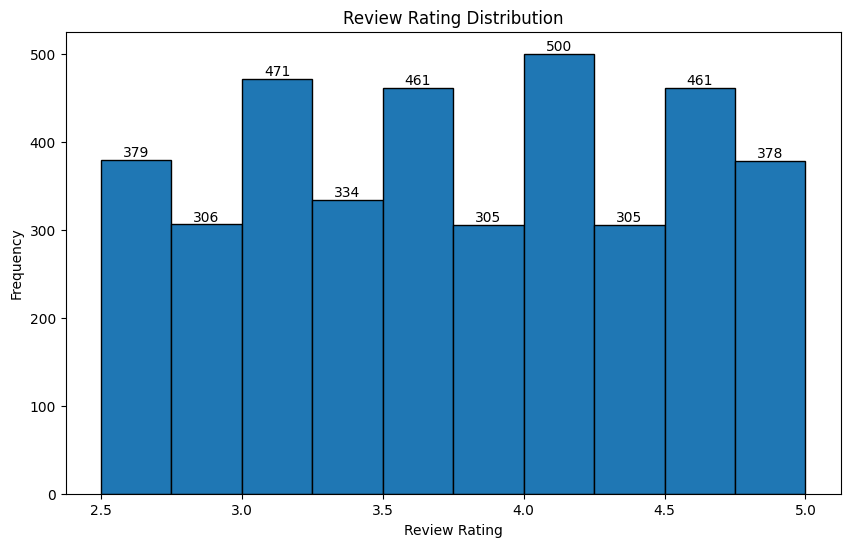

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
review_counts, bins, patches = plt.hist(df['review_rating'], bins=10, edgecolor='black')
plt.title("Review Rating Distribution")
plt.xlabel("Review Rating")
plt.ylabel("Frequency")

for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2,
             review_counts[i] + 0.5,
             int(review_counts[i]),
             ha='center', va='bottom')

plt.show()


<ipython-input-11-4434ed2d3c03>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis")


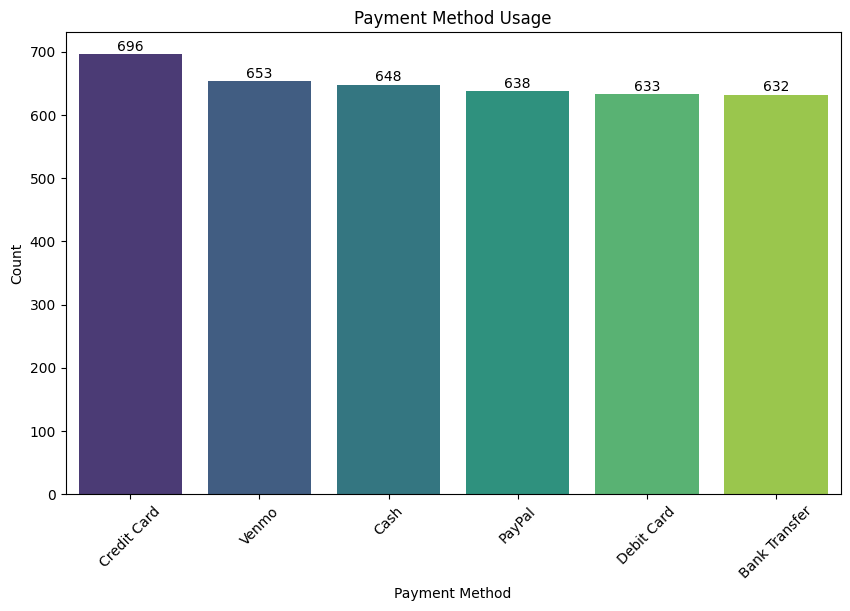

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
payment_counts = df['payment_method'].value_counts()
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis")
plt.title("Payment Method Usage")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)


for index, value in enumerate(payment_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom')

plt.show()


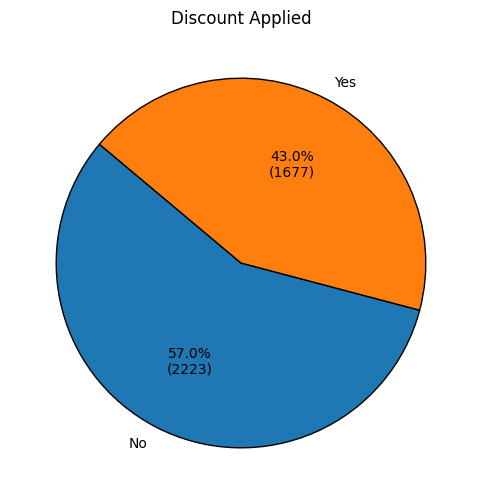

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 6))
discount_counts = df['discount_applied'].value_counts()


def func(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

discount_counts.plot(
    kind='pie',
    autopct=lambda pct: func(pct, discount_counts),
    startangle=140,
    title="Discount Applied",
    wedgeprops=dict(edgecolor='black')
)
plt.ylabel("")
plt.show()


<ipython-input-13-20c61f7957f8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purchase_frequency_counts.index, y=purchase_frequency_counts.values, palette="viridis")


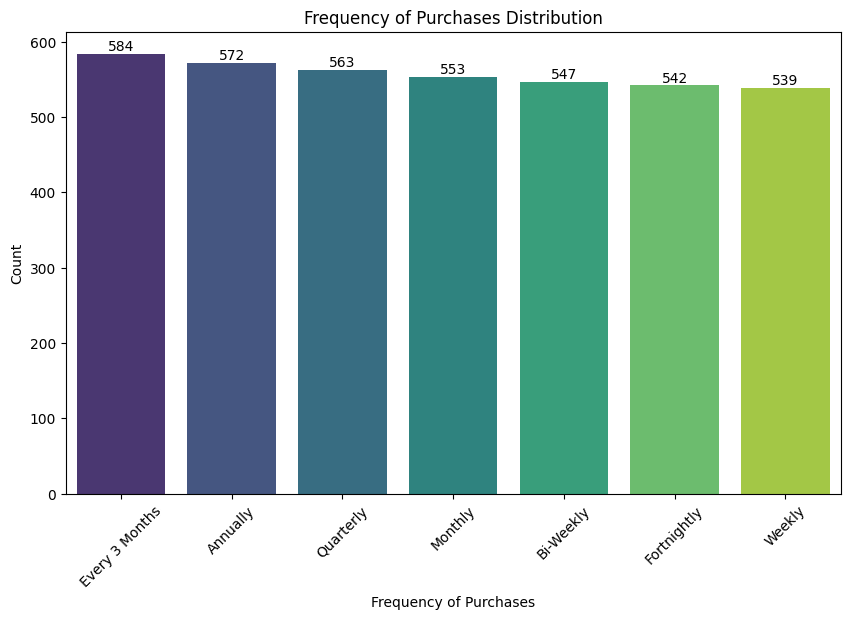

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
purchase_frequency_counts = df['frequency_of_purchases'].value_counts()
sns.barplot(x=purchase_frequency_counts.index, y=purchase_frequency_counts.values, palette="viridis")
plt.title("Frequency of Purchases Distribution")
plt.xlabel("Frequency of Purchases")
plt.ylabel("Count")
plt.xticks(rotation=45)


for index, value in enumerate(purchase_frequency_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom')

plt.show()


<ipython-input-14-bf8e3e716ec9>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_spending = df.groupby('age_group')['purchase_amount_(usd)'].mean()


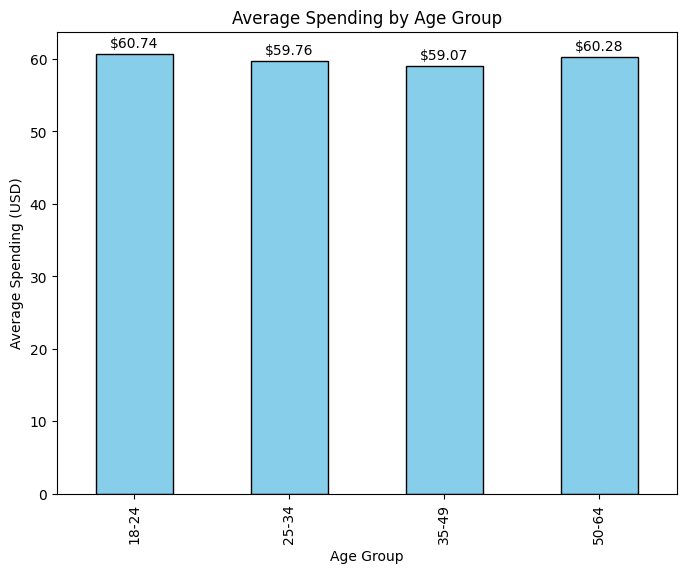

In [ ]:
import matplotlib.pyplot as plt


df['age_group'] = pd.cut(df['age'], bins=[18, 25, 35, 50, 65], labels=['18-24', '25-34', '35-49', '50-64'])
age_group_spending = df.groupby('age_group')['purchase_amount_(usd)'].mean()


plt.figure(figsize=(8, 6))
age_group_spending.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Spending by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Spending (USD)")

for index, value in enumerate(age_group_spending):
    plt.text(index, value + 0.5, f"${value:.2f}", ha='center', va='bottom')

plt.show()


In [ ]:

customer_lifetime_value = df.groupby('customer_id')['purchase_amount_(usd)'].sum()
print(customer_lifetime_value.head())


customer_id
1    53
2    64
3    73
4    90
5    49
Name: purchase_amount_(usd), dtype: int64


In [ ]:
total_revenue = df['purchase_amount_(usd)'].sum()
total_orders = df['purchase_amount_(usd)'].count()
aov = total_revenue / total_orders
print("Average Order Value (AOV): $", round(aov, 2))


Average Order Value (AOV): $ 59.76


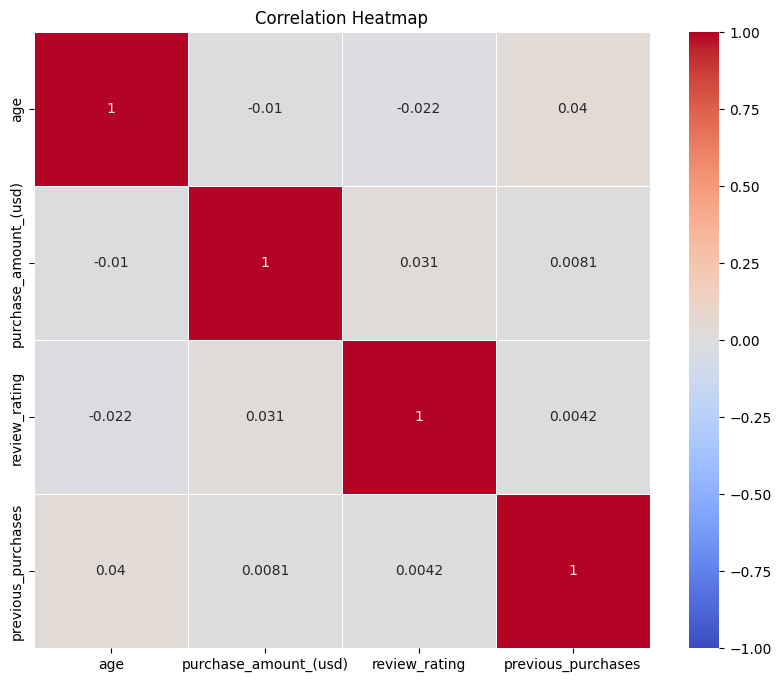

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
corr_matrix = df[['age', 'purchase_amount_(usd)', 'review_rating', 'previous_purchases']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
pip install plotly.express


In [ ]:
from sklearn.cluster import KMeans
import plotly.express as px


df_cluster = df[['age', 'purchase_amount_(usd)', 'previous_purchases']].dropna()


kmeans = KMeans(n_clusters=4, random_state=0).fit(df_cluster)
df_cluster['cluster'] = kmeans.labels_

fig = px.scatter_3d(df_cluster, x='age', y='purchase_amount_(usd)', z='previous_purchases',
                    color='cluster', title="Customer Segmentation by Spending and Purchases")
fig.update_traces(marker=dict(size=5))
fig.show()


In [ ]:
#bubble chart
import plotly.express as px


product_data = df.groupby('item_purchased').agg({
    'purchase_amount_(usd)': 'sum',
    'review_rating': 'mean',
    'item_purchased': 'size'
}).rename(columns={'item_purchased': 'purchase_count'})

fig = px.scatter(product_data, x='purchase_count', y='review_rating', size='purchase_amount_(usd)',
                 hover_name=product_data.index, title="Product Popularity and Average Rating",
                 labels={'purchase_count': 'Number of Purchases', 'review_rating': 'Average Rating'})
fig.update_traces(marker=dict(opacity=0.6, line=dict(width=1, color='DarkSlateGrey')))
fig.show()


In [ ]:
import plotly.express as px


hierarchy_data = df.groupby(['age_group', 'category', 'item_purchased']).size().reset_index(name='count')

# sunburst chart
fig = px.sunburst(hierarchy_data, path=['age_group', 'category', 'item_purchased'], values='count',
                  title="Customer Purchase Hierarchy")
fig.show()


<ipython-input-69-cd3772d88315>:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=F

In [ ]:
import plotly.graph_objects as go

# purchase frequency by age group
age_group_counts = df['age_group'].value_counts()

fig = go.Figure(go.Barpolar(
    r=age_group_counts.values,
    theta=age_group_counts.index,
    marker_color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],
    marker_line_color="black",
    marker_line_width=1.5,
    opacity=0.7
))

fig.update_layout(
    title="Purchase Frequency by Age Group",
    polar=dict(radialaxis=dict(visible=True, range=[0, max(age_group_counts.values) + 10])),
    showlegend=False
)
fig.show()


<ipython-input-73-267350fa0814>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




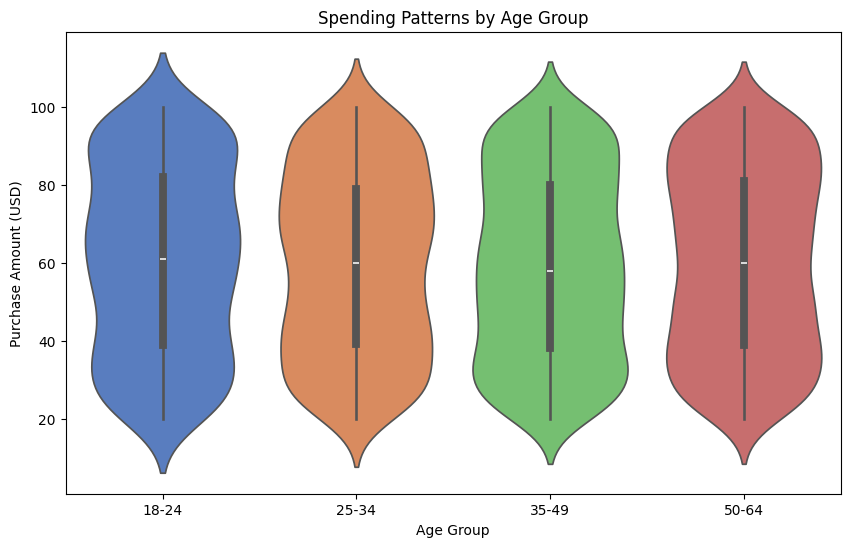

In [ ]:
#violin plot
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(x='age_group', y='purchase_amount_(usd)', data=df, palette="muted")
plt.title("Spending Patterns by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Purchase Amount (USD)")
plt.show()


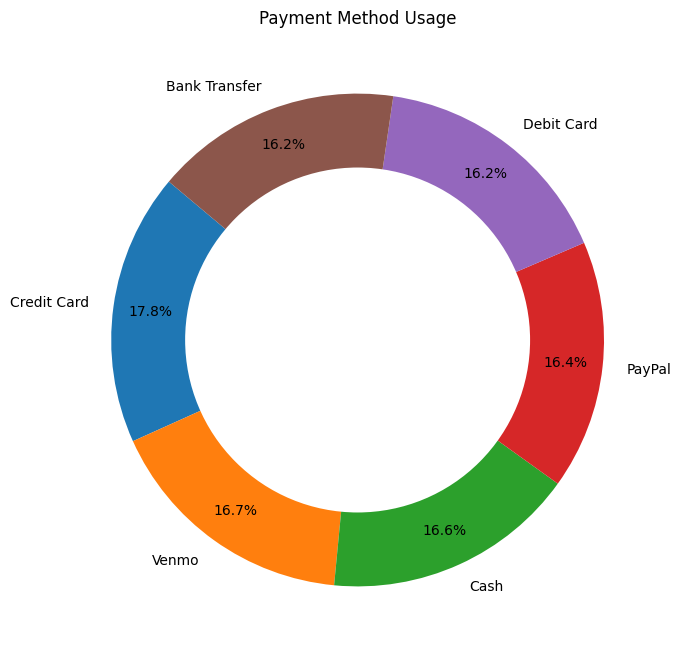

In [ ]:
import matplotlib.pyplot as plt

payment_counts = df['payment_method'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
center_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title("Payment Method Usage")
plt.show()



Based on the data and analysis provided, here are some trends and insights identified from the consumer behavior dataset:

1. Demographics and Customer Profile
Age Distribution: The average age of customers is around 44 years, with a range spanning from 18 to 70. This indicates a broad age range of customers, but the largest segment might be middle-aged adults.
Gender Distribution: The dataset contains a majority of male customers (approximately 68%), suggesting a male-dominant customer base.
2. Spending Patterns
Average Purchase Amount: The average purchase amount is about $59.76, with a wide variance. Some customers tend to make smaller purchases, while others buy high-value items.
Purchase Amount by Category: Categories like Clothing and Accessories are among the most popular, with significant average spending. This could suggest these categories are core to the business's product offering.
Spending by Age Group: Customers aged 25-34 and 35-49 show higher average spending, which could indicate that these age groups are more financially capable and willing to spend more.
3. Seasonal and Product Preferences
Seasonal Trends: The dataset shows a balanced distribution across all seasons, but Spring and Winter have slightly higher sales. This could indicate peak shopping seasons, possibly driven by holiday sales in Winter and Spring promotions.
Top Products: Items like blouses, jewelry, pants, and shirts are highly popular, suggesting these items are well-targeted to customer needs or preferences.
Colors and Sizes: Common colors such as olive, yellow, and silver are popular among customers, and medium (M) and large (L) sizes are the most commonly purchased. This might influence inventory planning to focus on these popular colors and sizes.
4. Discounts and Promotions
Discount and Promo Code Usage: Approximately 43% of purchases involved a discount, showing that a significant portion of customers are influenced by promotions. This suggests a customer base that responds positively to discounts, making promotions an effective sales driver.
Purchase Frequency with Discounts: Customers with discounts applied tend to have a higher purchase frequency. Promotional offers could be a strong tactic for increasing purchase rates.
5. Payment and Shipping Preferences
Payment Methods: Credit cards, Venmo, and cash are the most common payment methods. The preference for digital payment options (like Venmo) suggests that customers are open to modern, digital payment methods.
Shipping Options: "Free Shipping" is one of the top choices, with express and next-day options also frequently used. This might imply that customers value fast shipping but appreciate free shipping as an incentive.
6. Review Ratings
Average Rating: The average product review rating is around 3.75, with a slightly higher concentration around 3 to 4 stars. This suggests overall satisfaction but also highlights room for improvement, possibly by focusing on product quality or customer service enhancements.
7. Frequency of Purchases
Purchase Frequency Trends: Weekly and bi-weekly purchase frequencies are notable, indicating a pattern of frequent repeat customers. However, there is also a significant proportion of customers who make purchases quarterly or annually, possibly indicating different levels of customer loyalty or spending habits.

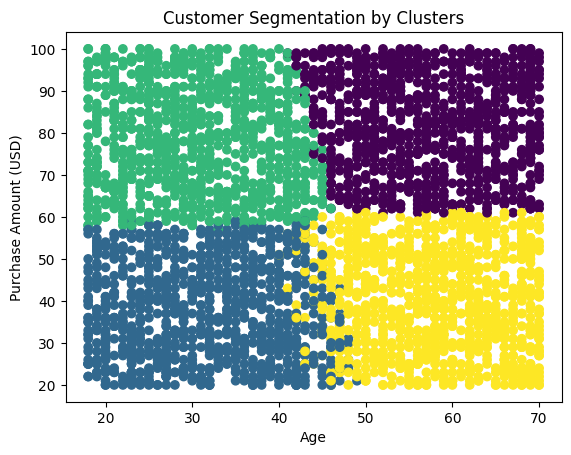

In [ ]:
#kmeansclustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting features for clustering
clustering_features = df[['age', 'purchase_amount_(usd)', 'previous_purchases']]
clustering_features = clustering_features.dropna()

# Fitting K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
df['cluster'] = kmeans.fit_predict(clustering_features)

# Plotting clusters
plt.scatter(clustering_features['age'], clustering_features['purchase_amount_(usd)'], c=df['cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.title('Customer Segmentation by Clusters')
plt.show()


In [ ]:
#product recommendation
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

# Create a pivot table of customers and their purchased products
purchase_matrix = pd.crosstab(df['customer_id'], df['item_purchased'])

# Calculate similarity matrix
similarity_matrix = cosine_similarity(purchase_matrix)

# Recommend products
def recommend(customer_id, n_recommendations=5):
    customer_idx = purchase_matrix.index.get_loc(customer_id)
    sim_scores = similarity_matrix[customer_idx]
    similar_customers = purchase_matrix.index[np.argsort(sim_scores)[-n_recommendations-1:-1][::-1]]
    recommended_items = purchase_matrix.columns[purchase_matrix.loc[similar_customers].sum() > 0]
    return recommended_items.tolist()

# Example usage
customer_id = 3899  # Replace with a valid customer_id from your data
print("Recommended products:", recommend(customer_id))


Recommended products: ['Shoes']
